<a href="https://colab.research.google.com/github/haroldsantiago/FundamentosRN/blob/main/clase26_04_2025_ejercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9643 - loss: 0.6386 - val_accuracy: 1.0000 - val_loss: 0.3300
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.2845 - val_accuracy: 1.0000 - val_loss: 0.1967
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.1803 - val_accuracy: 1.0000 - val_loss: 0.1467
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.1387 - val_accuracy: 1.0000 - val_loss: 0.1164
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.1101 - val_accuracy: 1.0000 - val_loss: 0.0943
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0895 - val_accuracy: 1.0000 - val_loss: 0.0769
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0729 - val_accuracy: 1.0000 - val_loss: 0.0627
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0596 - val_accuracy: 1.0000 - val_loss

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(



Precisión en el conjunto de prueba: 1.0000

Matriz de confusión:
[[400]]


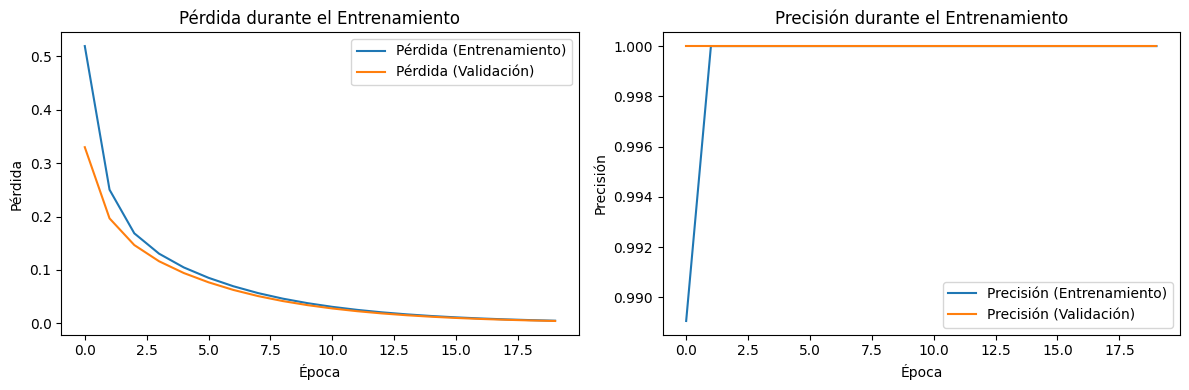

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

# 1. Generar datos sinteticos
np.random.seed(42) # para reproducibilidad
n_samples = 2000 # numero de clientes
n_features = 10 # numero de facturas

# Generar caracteristicas aleatorias (simulando edad, ingresos, etc)
x = np.random.rand(n_samples, n_features)# Datos normalizados

# Generar etiquetas binarias (0: no compra, 1: compra) basada en una combinacion lineal
weights = np.random.rand(n_features) # pesos ficticios
y = (np.dot(x, weights) + np.random.randn(n_samples) * 0.5 > 0).astype(int) # etiquetas binarias
#dividir datos en entrenamiento (80%) y prueba (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 2. crear el modelo (igual al original)
model = Sequential()
model.add(Dense(64, input_dim=10, activation='relu', kernel_regularizer=l2(0.01)))#capa oculta
model.add(Dense(1, activation='sigmoid'))

# 3. Compilar el modelo (igual al original)
model.compile( loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. resumen del modelo
model.summary()

# 5. Entrenar el modelo
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# 6. Evaluar el modelo en datos de prueba
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convertir probabilidades a clases (0 o 1)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"\nPrecisión en el conjunto de prueba: {accuracy:.4f}")
print("\nMatriz de confusión:")
print(conf_matrix)

# 7. Visualizar la pérdida y precisión durante el entrenamiento
plt.figure(figsize=(12, 4))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida (Entrenamiento)')
plt.plot(history.history['val_loss'], label='Pérdida (Validación)')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión (Entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Precisión (Validación)')
plt.title('Precisión durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()
